# Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [2]:
import pandas as pd

attrition_pop = pd.read_feather("dataset/attrition.feather")
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n = 50, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()
mean_attrition_pop = attrition_pop["Attrition"].mean()
# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [3]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n = 100, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_srs100 - mean_attrition_pop)/mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


# Relative error vs. sample size

The plot shows the relative error in the proportion of employee attritions, using simple random sampling, for sample sizes from 2 to 1470 (the size of the population).

Clicking "Regenerate plot" will select new samples for each sample size, and calculate the relative errors again.

Which statement about relative errors and sample sizes is true?

<center><img src="images/03.01.png"  style="width: 400px, height: 300px;"/></center>

- The more the sample size, the less the relative error

# Replicating samples

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

In [4]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.23333333333333334, 0.16666666666666666, 0.1, 0.13333333333333333, 0.15]


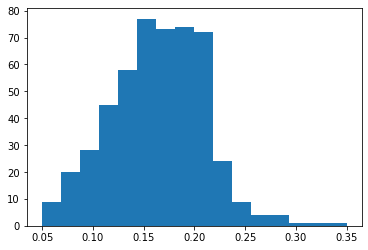

In [5]:
import matplotlib.pyplot as  plt
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

# Replication parameters

The dashboard shows a histogram of sample mean proportions of employee attrition. There are two parameters: the size of each simple random sample, and the number of replicates. It's important to understand how each of these parameters affects the result. Use the parameter sliders to explore different values and note their effect on the histogram.

Which statement about the effect of each parameter on the distribution of sample means is true?

<center><img src="images/03.02.png"  style="width: 400px, height: 300px;"/></center>

- As the sample size increases, the range of calculated sample means tends to decrease.

# Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

In [6]:
# Expand a grid representing 5 8-sided dice
from itertools import product

die1 = die2 = die3 = die4 = die5 = [1,2,3,4,5,6,7,8]

dice = pd.DataFrame(list(product(die1, die2, die3, die4, die5 )), columns=['die1', 'die2', 'die3', 'die4', 'die5'])

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [9]:
# from tidyrpy import expand_grid
# # Expand a grid representing 5 8-sided dice
# dice = pd.expand_grid(
#   {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
#    'die2': [1, 2, 3, 4, 5, 6, 7, 8],
#    'die3': [1, 2, 3, 4, 5, 6, 7, 8],
#    'die4': [1, 2, 3, 4, 5, 6, 7, 8],
#    'die5': [1, 2, 3, 4, 5, 6, 7, 8]
#   })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice["die1"] +dice["die2"] +dice["die3"] +dice["die4"] +dice["die5"] ) /5
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype("category")

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


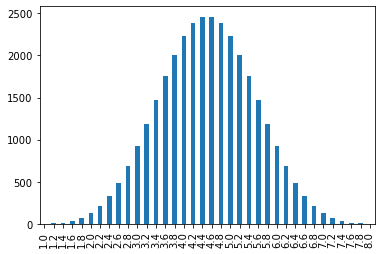

In [10]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind = "bar")
plt.show()

# Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

In [12]:
import numpy as np
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,8+1)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

3.8


In [13]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    temp = np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    sample_means_1000.append(temp)
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[4.4, 5.6, 5.4, 3.6, 4.8, 5.6, 4.0, 6.0, 5.0, 4.2]


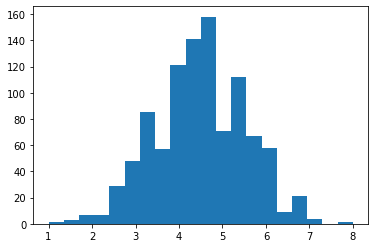

In [14]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

# Exact vs. approximate

You've seen two types of sampling distribution now (exact and approximate). It's really important to understand when each should be computed.

Should we always be able to compute the exact sampling distribution directly?

- No, the computational time and resources needed to look at the population of values could be too much for our problem.

# Population & sampling distribution means

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

In [21]:
sampling_distribution=[]
size_list = [5, 50, 500]
# Replicate the sampling code 1000 times
for sample_size in size_list:
    sample_means = []
    for i in range(sample_size):
        temp = attrition_pop["Attrition"].sample(sample_size, replace=True).mean()
        sample_means.append(temp)
    print(np.mean(sample_means))
    sampling_distribution.append(sample_means)
    
pop_mean = attrition_pop["Attrition"].mean()

# Calculate the mean of the mean attritions for each sampling distribution


# Print the results

print(pop_mean)

0.2
0.16359999999999997
0.16200799999999999
0.16122448979591836


# Population & sampling distribution variation

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

In [22]:
sampling_distribution_5 = sampling_distribution[0]
sampling_distribution_50 = sampling_distribution[1]
sampling_distribution_500 = sampling_distribution[2]
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.14142135623730953
0.056811898724956324
0.016684744450988442
